<a href="https://colab.research.google.com/github/MichelAsselin/data-analysis-portfolio/blob/Superstore_Profitability_Analysis/Superstore_Profitability_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superstore: Profitability Analysis
**Author**: Michel Asselin

**Environment**: Python (Google Colab)

# Executive Summary
- Analysis of Superstore’s U.S. sales data from 2014–2017 to identify profitability's key drivers across products, regions, customer segments, and shipping modes.
- Key findings: profitability is heavily influenced by discounting practices, with profit margins turning negative once discounts exceed 25–30%.
- Categories: Technology and Office Supplies generate the most profit overall, while Furniture consistently underperforms due to excessive discounts.
- Profitability uneven across Regions: the West and East regions lead profitability and the Central and South regions are lagging behind them.
- Recommendations: implementing stricter discount controls, optimizing pricing in underperforming sub-categories, and improving regional and shipping efficiency can significantly enhance Superstore’s overall profitability without reducing sales volume.

# I. Introduction

## I.A. Dataset source & citation
This dataset comes from Tableau and submitted on [Kaggle](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/data?select=Sample+-+Superstore.csv) by Vivek Chowdhury. The original dataset comes from the Tableau website.

**Source**:
Martin, Michael (October 27, 2022). *Sample - Superstore Sales (Excel).xls*. Tableau from Salesforce. Retrieved from: https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls

## I.B. Business context
This project analyzes the sales and profitability performance of a retail company across categories, regions, and customer segments.
The dataset represents retail simulated transactions from a US-based Superstore between 2014 and 2017. It includes information on sales, profit, discount, shipping modes, and customer segments across different regions, states, categories, and sub-categories.

## I.C. Objective
This analysis aims to:
- identify the key factors influencing sales and profitability,
- evaluate regional and segment differences, and
- provide data-driven insights improving profit margins.

The goal is to understand what drives revenue and profitability, and how business strategies such as discounting and shipping modes affect performance.

## I.D. Questions
**Overall Performance**
- How have sales and profit margin evolved over time?
- Which product categories and sub-categories drive the most profit?

**Regional and Segment Insights**
- Which regions and states generate the most revenue and profit?
- Are there regional differences in discount usage?
- Which customer segments are the most valuable?

**Profitability Drivers**
- Do discounts negatively affect profit margins?
- What is the relationship between sales volume and profit margin?

**Operational Factors**
- Does the shipping mode affect profitability or delivery efficiency?
- What overall trends can guide better pricing, discounting, and logistics decisions?

We address each question through visual analysis using Python and the pandas, numpy, matplotlib, and Seaborn modules.

In [53]:
# Modules
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Advanced Data Visualization
import matplotlib.ticker as mtick #Modify ticks on axis
from pathlib import Path #Data-path
import sys

print("Setup Complete")

Setup Complete


In [54]:
print("Python:", sys.version.split()[0])
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

Python: 3.12.12
pandas: 2.2.2
numpy: 2.0.2
matplotlib: 3.10.0
seaborn: 0.13.2


In [55]:
# Data-path loader
csv_candidates = [
    Path("data/Sample - Superstore.csv"),
    Path("Sample - Superstore.csv"),
    Path("/content/Sample - Superstore.csv")  # Colab/Kaggle
]

csv_path = next((p for p in csv_candidates if p.exists()), None)

if csv_path is None:
    raise FileNotFoundError(
        "Dataset not found. Download 'Sample - Superstore.csv' from Kaggle "
        "(https://www.kaggle.com/datasets/vivek468/superstore-dataset-final) "
        "and place it in the repo root or in a 'data/' folder."
    )

df = pd.read_csv(csv_path, encoding="ISO-8859-1",
                 parse_dates=["Order Date", "Ship Date"]).set_index("Row ID")
print(f"Loaded {csv_path} — {len(df)} rows")

Loaded Sample - Superstore.csv — 9994 rows


In [56]:
# Read the CSV file with the right encoding
df = pd.read_csv(csv_path, encoding="ISO-8859-1",
                 parse_dates=["Order Date", "Ship Date"]).set_index("Row ID")

In [57]:
# Setting theme for graphs
sns.set_theme(context='notebook', style = "whitegrid", palette= "colorblind",
              font_scale=1.1)

## Methods
### Profit Margins & Discount rates (Sales-Weighted)
Margins and discount rates are computed as ratio-of-sums (sales-weighted) per group. We use them because our data points naturally have different levels of importance

### Turning date columns into date

We turn the Order Date and Ship Date values as dates.

In [58]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

### Additional Columns

We add a profit margin column to calculate the financial ratio of profit earned in relation to its revenue. We use sales as the revenue.

We also add a delivery time column to calculate the number of days it takes for an order to be shipped compared to the day it was ordered.

In [59]:
# Profit Margin = (Profit * 100) / Sales
df["Profit Margin"] = ((df["Profit"] * 100) / df["Sales"])

# Delivery Time = Shipping Date - Order Date converted into days
df["Delivery Time"] = ((df["Ship Date"] - df["Order Date"]).dt.days)


# II. Dataset Overview, Cleaning, and Exploration


## Data Cleaning

In [60]:
df.shape

(9994, 22)

Our dataset counts initially 22 columns and 9994 rows.

Then, we find the data types and count of non-null values in the dataset.

In [61]:
# Finding the data types and number of non-null values in the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 non-nu

We look at the amount of NULL values in each column.

In [62]:
# Amount of NA values in each column
df.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


We check for duplicates and remove them from the dataset.

In [63]:
# checking if there are any duplicates
df.duplicated().sum()

# removing duplicate rows
df = df.drop_duplicates()

# re-checking if there are any duplicates
df.duplicated().sum()

np.int64(0)

We summarize the qualities of the dataset.

In [64]:
Summary_data_quality= {
    "Rows": len(df),
    "Columns": len(df.columns),
    "Duplicate Order Lines": df.duplicated().sum(),
    "Missing values": df.isna().sum().sum(),
    "Negative sales": (df["Sales"]<0).sum(),
    "Negative quantity": (df["Quantity"]<0).sum()}

pd.Series(Summary_data_quality)

,0
Rows,9993
Columns,22
Duplicate Order Lines,0
Missing values,0
Negative sales,0
Negative quantity,0


This data shows us that there are no missing values, 9993 rows (after cleaning duplicates), 22 columns. There are also no duplicate rows, and no negative sales and negative quantity. Our data is thus ready to be used.

## KPIs and Summary Metrics

We summarize the dataset's metrics, such as total sales, total profit, overall margin, top category by profit, and top region by profit.

In [65]:
summary = {
    "Total Sales": df["Sales"].sum(),
    "Total Profit": df["Profit"].sum(),
    "Overall Margin %": 100 * df["Profit"].sum() / df["Sales"].sum(),
    "Top Category by Profit": df.groupby("Category")["Profit"].sum().idxmax(),
    "Top Region by Profit": df.groupby("Region")["Profit"].sum().idxmax()
}
pd.Series(summary)


,0
Total Sales,2296919.4883
Total Profit,286409.0805
Overall Margin %,12.469269
Top Category by Profit,Technology
Top Region by Profit,West


We find at the least profitable products in the dataset.

In [66]:
loss_products = (df.groupby(["Product Name","Sub-Category","Category"])
                   .agg(Sales=("Sales","sum"), Profit=("Profit","sum"))
                   .sort_values("Profit").head(10))
loss_products

,,,Sales,Profit
Product Name,Sub-Category,Category,,
Cubify CubeX 3D Printer Double Head Print,Machines,Technology,11099.963,-8879.9704
Lexmark MX611dhe Monochrome Laser Printer,Machines,Technology,16829.901,-4589.9730
Cubify CubeX 3D Printer Triple Head Print,Machines,Technology,7999.980,-3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,Tables,Furniture,9917.640,-2876.1156
Bush Advantage Collection Racetrack Conference Table,Tables,Furniture,9544.725,-1934.3976
GBC DocuBind P400 Electric Binding System,Binders,Office Supplies,17965.068,-1878.1662
Cisco TelePresence System EX90 Videoconferencing Unit,Machines,Technology,22638.480,-1811.0784
Martin Yale Chadless Opener Electric Letter Opener,Supplies,Office Supplies,16656.200,-1299.1836
Balt Solid Wood Round Tables,Tables,Furniture,6518.754,-1201.0581


We calculate the dataset's Key Performance Indicators, and look at its summary metrics.

In [67]:
Total_Sales = df["Sales"].sum()
Total_Profit = df["Profit"].sum()
Average_Discount = df["Discount"].mean()
Average_Delivery_Days = df["Delivery Time"].mean()
Average_Profit_Margin = df["Profit Margin"].mean()

print(f"Total Sales: ${Total_Sales:,.0f}")
print(f"Total Profit: ${Total_Profit:,.0f}")
print(f"Average Discount: {Average_Discount*100:,.2f}%")
print(f"Average Delivery Days: {Average_Delivery_Days:,.1f} days")
print(f"Average Profit Margin: {Average_Profit_Margin:,.2f}%")

Total Sales: $2,296,919
Total Profit: $286,409
Average Discount: 15.62%
Average Delivery Days: 4.0 days
Average Profit Margin: 12.03%


We calculate the average discount percentage for each category.

In [68]:
Tech_Discount_Avg = df.loc[df["Category"] == "Technology", "Discount"].mean()
Furniture_Discount_Avg = df.loc[df["Category"] == "Furniture", "Discount"].mean()
Office_Discount_Avg = df.loc[df["Category"] == "Office Supplies", "Discount"].mean()

print(f"Average Technology Discount: {100 * Tech_Discount_Avg:,.2f}%")
print(f"Average Furniture Discount: {100 * Furniture_Discount_Avg:,.2f}%")
print(f"Average Office Supplies Discount: {100 * Office_Discount_Avg:,.2f}%")

Average Technology Discount: 13.23%
Average Furniture Discount: 17.39%
Average Office Supplies Discount: 15.73%


We calculate the average discount percentage for each sub-category.

In [69]:
for cat in df["Sub-Category"].unique():
    avg = df.loc[df["Sub-Category"] == cat, "Discount"].mean()*100
    print(f"{cat} Average Discount: {avg:,.2f}%")

Bookcases Average Discount: 21.11%
Chairs Average Discount: 17.00%
Labels Average Discount: 6.87%
Tables Average Discount: 26.13%
Storage Average Discount: 7.47%
Furnishings Average Discount: 13.83%
Art Average Discount: 7.49%
Phones Average Discount: 15.46%
Binders Average Discount: 37.23%
Appliances Average Discount: 16.65%
Paper Average Discount: 7.49%
Accessories Average Discount: 7.85%
Envelopes Average Discount: 8.03%
Fasteners Average Discount: 8.20%
Supplies Average Discount: 7.68%
Machines Average Discount: 30.61%
Copiers Average Discount: 16.18%


## Descriptive Statistics

In [70]:
# Descriptive statistics for every numerical columns
df.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Profit Margin,Delivery Time
count,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,2016-04-30 01:53:33.089162240,2016-05-04 00:53:19.039327488,55191.576403,229.852846,3.789753,0.156188,28.660971,12.033026,3.958171
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,-275.000000,0.000000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.731000,7.500000,3.000000
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56560.000000,54.480000,3.000000,0.200000,8.671000,27.000000,4.000000
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,36.250000,5.000000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,50.000000,7.000000
std,NaN,NaN,32065.074478,623.276074,2.225149,0.206457,234.271476,46.677485,1.747654


A glance at the dataset's top 5 rows.

In [71]:
# A first impression of the dataset's top rows
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Delivery Time
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00,3
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00,3
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00,4
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00,7
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25,7


## Correlations between key numerical variables

To understand how sales, quantity, profit, profit margin, delivery time, and discount interact, we start with a correlation analysis of key numerical variables.

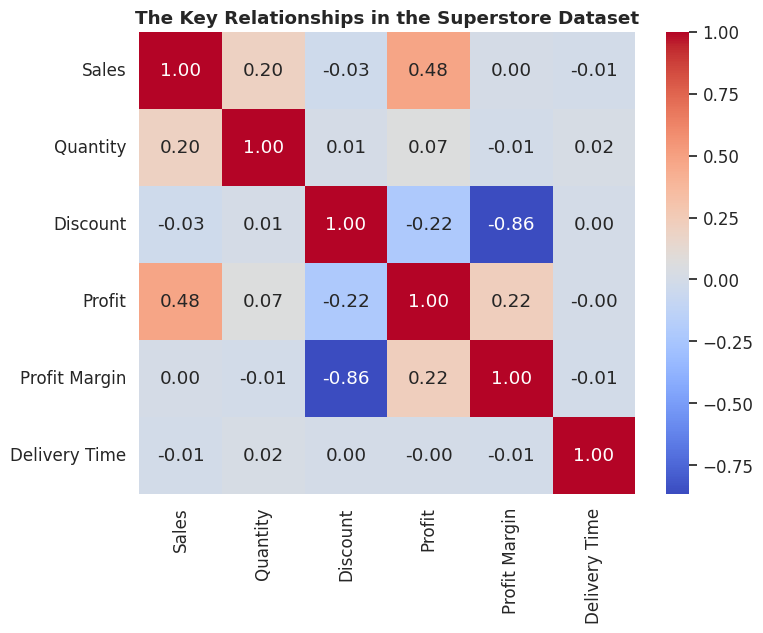

In [72]:
num_cols = ["Sales", "Quantity", "Discount", "Profit", "Profit Margin", "Delivery Time"]
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("The Key Relationships in the Superstore Dataset", fontweight = 'bold')
plt.show()

Sales and profit are positively correlated (0.48) but do not have a strong relationship. However, discount has a strong negative correlation with profit (-0.22). The heatmap shows that discounts have a strong negative correlation (−0.86) with profit margin, showing that higher discounts significantly reduce profitability and do not drive profitable growth. Sales and profit are moderately correlated (0.48), suggesting that higher sales volumes do not automatically translate into significant profit margins. Quantity and Sales have a relatively weak positive relationship (0.2), showing that Quantity is not the primary driver of Sales. Other variables show weak relationships, such as Quantity and Profit (0.07) and Quantity and Profit Margin (-0.01), meaning discounting is the dominant profitability driver.

# III. Sales and Profit Margins Over Time

We examine how sales and profit margins evolved from 2014 to 2017 to understand the company’s growth trajectory and profitability trends over time.

## How have sales and profit margin evolved over time?

In [73]:
# Resampling date column into a month column
sales_monthly = df.resample('MS', on='Order Date')['Sales'].sum()
profit_monthly = df.resample('MS', on='Order Date')['Profit'].sum()

# Computing Monthly Profit Margin
margin_profit_monthly = 100 * profit_monthly / sales_monthly

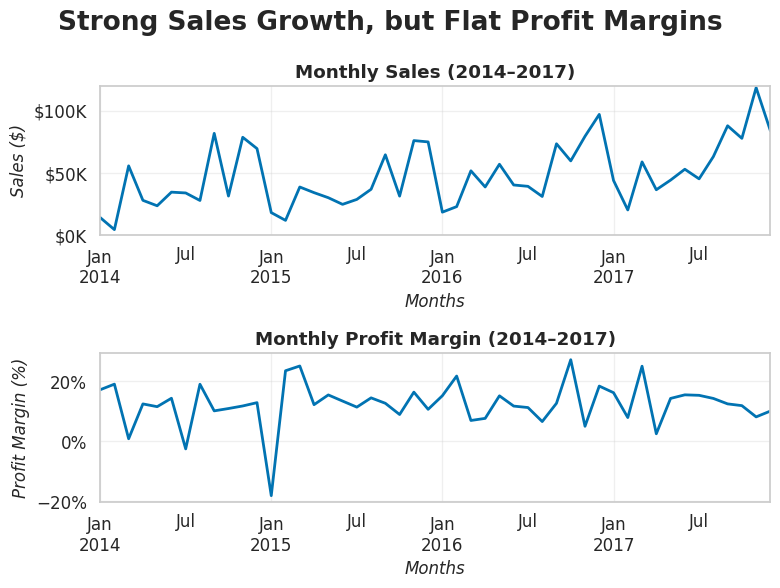

In [74]:
fig, ax = plt.subplots(2,1, figsize = (8, 6))
sales_monthly.plot(linewidth=2, ax = ax[0])

# Line plot monthly sales
ax[0].set_title("Monthly Sales (2014–2017)", fontweight = "bold")
ax[0].set_ylabel("Sales ($)", fontsize = 12, style= "italic")
ax[0].set_xlabel("Months", fontsize = 12, style= "italic")
ax[0].set_ylim(0, 120000)
ax[0].grid(True, alpha=0.3)
ax[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Line plot monthly profit margin
margin_profit_monthly.plot(linewidth = 2, ax=ax[1])
ax[1].set_title("Monthly Profit Margin (2014–2017)", fontweight = "bold")
ax[1].set_ylabel("Profit Margin (%)", fontsize = 12, style= "italic")
ax[1].set_xlabel("Months", fontsize = 12, style= "italic")
ax[1].grid(True, alpha=0.3)
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 100,
                                                       decimals = 0))


plt.suptitle("Strong Sales Growth, but Flat Profit Margins",
             size = "x-large", fontweight = "bold")
plt.grid(True, alpha=0.3)

# Visualize figure
plt.tight_layout()
plt.show()

Sales rose steadily over the four-year period, especially after June 2016, to peak near the end of 2017 (approximately 120$ USD), showing consistent revenue growth.

Profit margins, however, fluctuated sharply and failed to follow the same upward trend, indicating that higher sales were driven by discounting or cost pressure rather than improved efficiency. We also notice a significant steep decline in profit margin in January 2015.

This suggests the company expanded volume without securing proportional profitability, which risks long-term profitability.

# IV. Category and Sub-Category Performance

## Which product categories and sub-categories drive the most profit?

Next, we analyze profitability by product category and sub-category to identify which areas of the product portfolio contribute most, and least, to total profit.

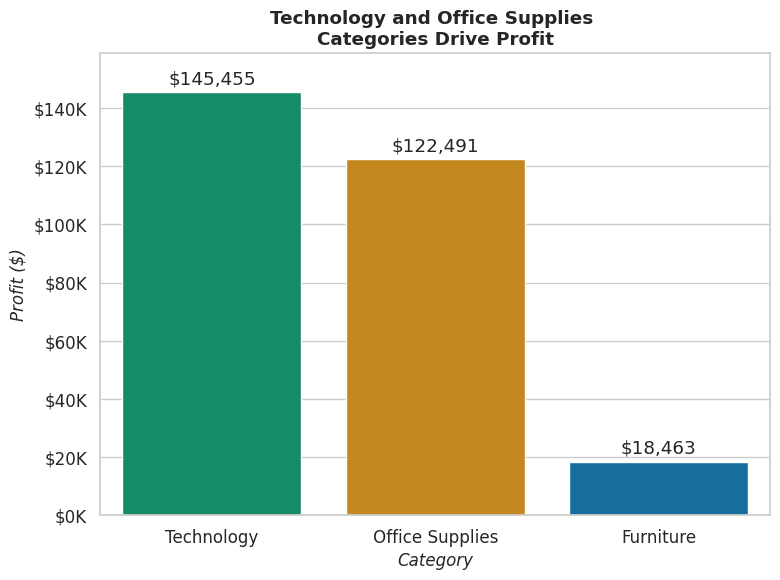

In [75]:
plt.figure(figsize = (8, 6))
order_cat = (df.groupby("Category")["Profit"].sum().
             sort_values(ascending = False).index)
ax = sns.barplot(data = df, x = "Category", y = "Profit",
            estimator = sum, hue = "Category",
            errorbar= None, order = order_cat)

# Formatting Y-Axis
plt.ylim(0,159000)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _:
                                                 f'${int(x/1000)}K'))

# Formatting X-Axis
for container in ax.containers:
  ax.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3)

# Title and labels
plt.title("Technology and Office Supplies \nCategories Drive Profit", fontweight = "bold")
plt.xlabel("Category", fontsize = 12, style= "italic")
plt.ylabel("Profit ($)", fontsize = 12, style = "italic")

# Visualize figure
plt.tight_layout()
plt.show()

Technology yields the highest profit (145K USD), followed by Office Supplies (122K USD). Furniture performs far below the other two categories, generating only 18K USD in profit.

The gap indicates that Furniture’s cost structure or discount strategy significantly reduces its profitability compared to the rest of the product mix.

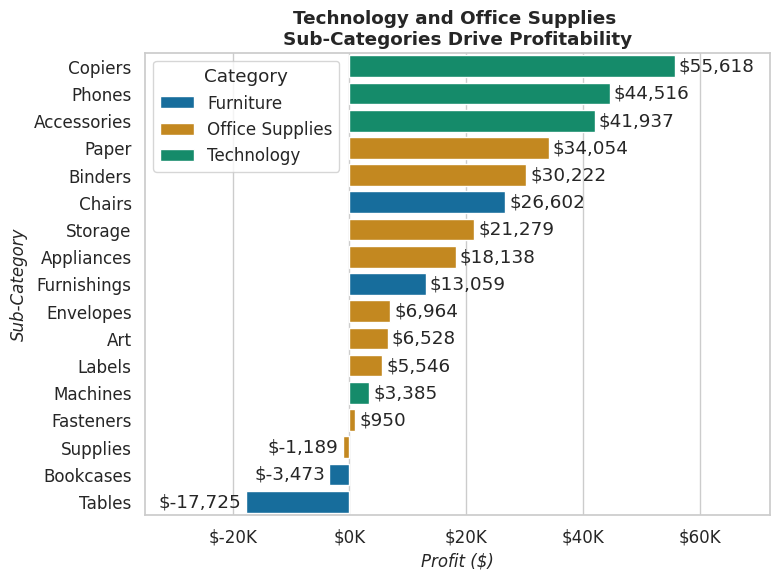

In [76]:
# Size of figure
plt.figure(figsize = (8, 6))

# Values order
order_subcat = (df.groupby("Sub-Category")['Profit'].sum().
                sort_values(ascending = False).index)

ax = sns.barplot(data = df, x = "Profit", y = "Sub-Category",
            hue = "Category", estimator = sum, dodge=False,
            order = order_subcat, errorbar = None)

# Readability
plt.xlim(-35000, 72000)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
for container in ax.containers:
  ax.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3)

# Annotations
plt.title("Technology and Office Supplies \nSub-Categories Drive Profitability", fontweight = "bold")
plt.xlabel("Profit ($)", fontsize = 12, style= "italic")
plt.ylabel("Sub-Category", fontsize = 12, style= "italic")

# Visualize figure
plt.tight_layout()
plt.show()

The most profitable sub-categories belong to Technology (Copiers, Phones, Accessories) and Office Supplies (Paper, Binders, Storage). In contrast, several Furniture sub-categories such as Tables and Bookcases generate losses, with Tables alone losing about 17K USD.

This highlights the sub-categories with which Superstore earns against where it loses profit, which suggests a need to reassess pricing or inventory strategy in the underperforming Furniture lines.

# V. Regional & Geographic Analysis

Regional analysis helps reveal where Superstore performs best geographically and where operational or pricing inefficiencies may exist.

## Which regions and states generate the most revenue and profit?


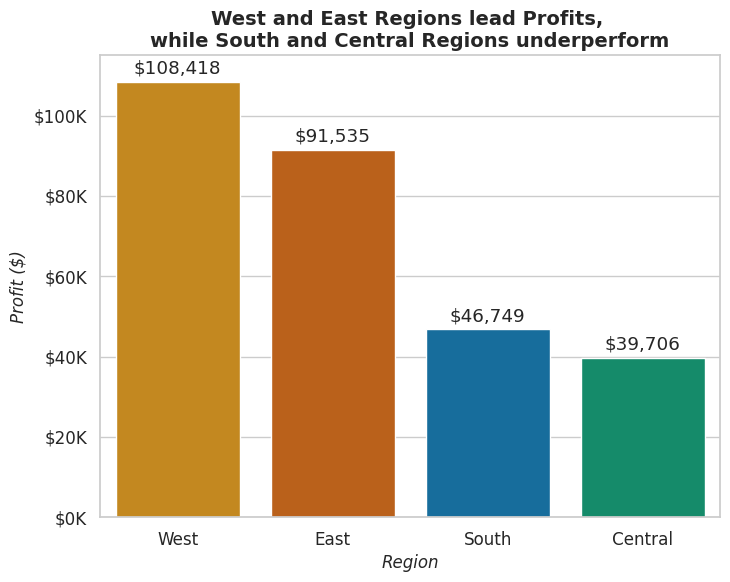

In [77]:
# Regional & State Analysis
order = (df.groupby("Region") # Groups df by unique values of "State"
         ["Profit"]. # select only the "Sales" column for each group
         sum(). # for each state, sum the sales values
         sort_values(ascending = False). # sort series from largest to smallest
         head(25). # Select only first 25 states
         index) # Gets just the index labels (the state names) in the sorted order

plt.figure(figsize = (8, 6))
ax = sns.barplot(data = df, x = "Region",
            y = "Profit",
            estimator = sum,
            order = order,
            errorbar = None,
            dodge = False,
            hue = "Region")

plt.xlabel("Region", fontsize = 12, style= "italic")
plt.ylabel("Profit ($)", fontsize = 12, style= "italic")
plt.title("West and East Regions lead Profits, \nwhile South and Central Regions underperform", fontsize=14,
          fontweight="bold")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _:
                                                 f'${int(x/1000)}K'))
plt.ylim(0, 115000)

for container in ax.containers:
  ax.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3)

# Visualize figure
plt.show()

The West region generates the highest profit (108K USD), followed by the East (92K USD). In contrast, the South and Central regions lag significantly, contributing less than half the profit of the top regions. This performance gap suggests that regional pricing, product mix, or discount policies may need adjustment to improve profitability outside the West and East.

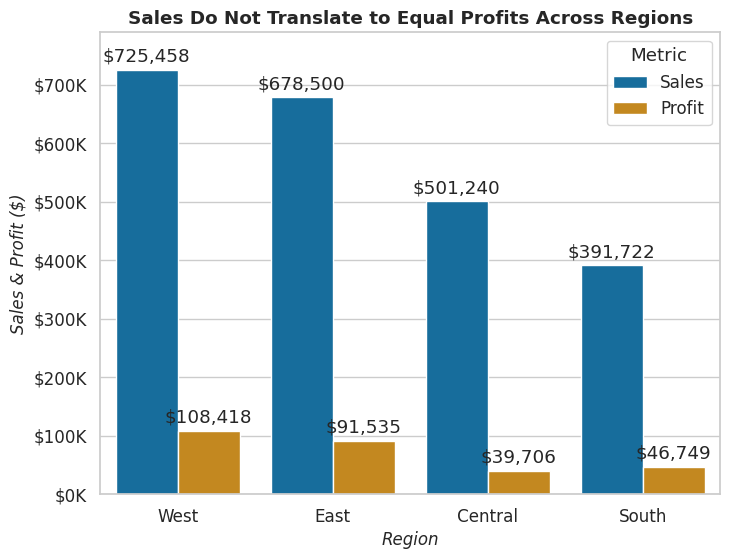

In [78]:
# Aggregate total Sales and Profit per Region
region_sales_profits = df.groupby("Region", as_index = False )[["Sales", "Profit"]].sum()

# Reshape the data as Long Format
region_melted = region_sales_profits.melt(id_vars="Region", var_name="Metric", value_name="Value")

# Order the regions by total sales
order_sales = region_sales_profits.sort_values("Sales", ascending=False)["Region"]

# Grouped Bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=region_melted, x="Region", y="Value", hue="Metric", errorbar=None, order=order_sales)
plt.ylim(0, 790000)
plt.title("Sales Do Not Translate to Equal Profits Across Regions", fontweight="bold")
plt.xlabel("Region", fontsize=12, style="italic")
plt.ylabel("Sales & Profit ($)", fontsize=12, style="italic")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Annotate bars
for container in ax.containers:
  ax.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3)

# Visualize figure
plt.show()

While the West and East regions lead in both sales and profit, the Central and South regions underperform on profitability despite substantial revenue. The Central Region has lower Profit than the South region despite higher Sales. This suggests that factors such as higher discounting or elevated operational costs are cutting into margins. Regional strategies should focus on improving efficiency and pricing discipline in these lower-performing areas.

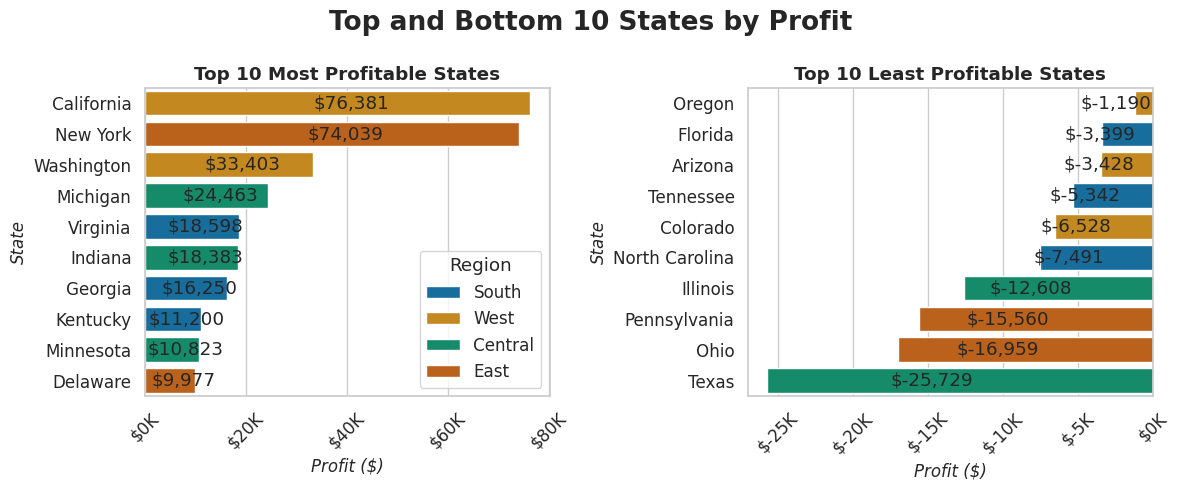

In [79]:
# Size of figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Orders
order_head = (df.groupby("State") # Groups df by unique values of "State"
         ["Profit"]. # select only the "Sales" column for each group
         sum(). # for each state, sum the sales values
         sort_values(ascending = False). # sort series from largest to smallest
         head(10). # Select only first 25 states
         index) # Gets just the index labels (the state names) in the sorted order

# Top 10 most profitable states
sns.barplot(x = df["Profit"],
            y = df["State"],
            estimator = sum,
            order = order_head,
            errorbar = None,
            dodge = False,
            hue = df["Region"], ax = ax[0])
ax[0].set_title("Top 10 Most Profitable States", fontweight = "bold")
ax[0].set_xlabel("Profit ($)", fontsize = 12, style= "italic")
ax[0].set_ylabel("State", fontsize = 12, style= "italic")
ax[0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='${:,.0f}', label_type='center', padding=10)


# Orders for least profitable states
order_tail = (df.groupby("State") # Groups df by unique values of "State"
         ["Profit"]. # select only the "Sales" column for each group
         sum(). # for each state, sum the sales values
         sort_values(ascending = False). # sort series from largest to smallest
         tail(10). # Select only first 25 states
         index) # Gets just the index labels (the state names) in the sorted order

# Top 10 least profitable states
sns.barplot(x = df["Profit"],
            y = df["State"],
            estimator = sum,
            order = order_tail,
            errorbar = None,
            dodge = False,
            legend=False,
            hue = df["Region"], ax = ax[1])
ax[1].set_title("Top 10 Least Profitable States", fontweight = "bold")
ax[1].set_xlabel("Profit ($)", fontsize = 12, style= "italic")
ax[1].set_ylabel("State", fontsize = 12, style= "italic")
ax[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].tick_params(axis='x', rotation=45)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='${:,.0f}', label_type='center', padding=20)

plt.suptitle("Top and Bottom 10 States by Profit", fontweight = "bold", size = "x-large")
# Visualize figure
plt.tight_layout()
plt.show()

Profitability is heavily concentrated in California and New York, which together account for a large share of total profit. Conversely, Texas, Ohio, and Pennsylvania generate significant losses, with Texas alone losing over $25K. Both the top and bottom performing states are evenly distributed across regions, indicating that profitability challenges are not region-specific but rather depend on state-level market conditions impacting profit magnitude. This uneven performance across states points to regional pricing inefficiencies or operational cost disparities that warrant targeted review.

## VI. Customer Segments

Evaluating customer segments provides insight into which types of customers drive the most value for the business.

## Which customer segments are the most valuable?

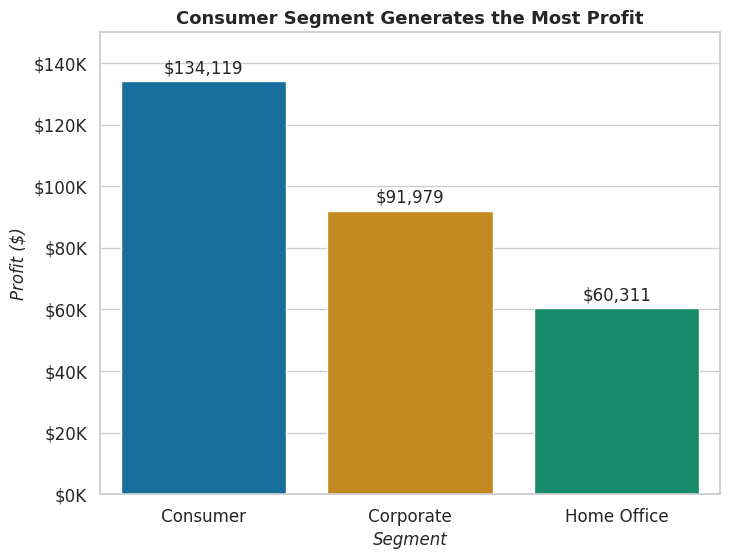

In [80]:
# Segment Analysis
plt.figure(figsize=(8, 6))
ax = sns.barplot(data = df, x = "Segment", y = "Profit", estimator = sum, hue = "Segment", errorbar = None)

# Titles and Labels
plt.title("Consumer Segment Generates the Most Profit", fontweight="bold", fontsize=13)
plt.xlabel("Segment", fontsize = 12, style= "italic")
plt.ylabel("Profit ($)", fontsize = 12, style= "italic")

# Formatting Y-axis for readability
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.ylim(0, 150000)

# Annotate bars
for container in ax.containers:
  ax.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3, fontsize = 12)

# Visualize figure
plt.show()

The Consumer segment delivers the largest total profit (134K USD), well ahead of the Corporate (92K USD) and Home Office (60K USD) segments. This indicates that retail consumers are the Superstore's strongest revenue and profit driver. However, the higher profitability may also reflect larger sales volume rather than efficiency, suggesting potential to increase margins in the Corporate and Home Office segments through targeted pricing or adapted product strategies.

# VII. Discounts and Profitability

Discounts are a major profitability lever. We assess how discount intensity varies by region and category and how it impacts profit margins.

## Are there regional differences in discount usage?


In [81]:
# Aggregate weighted discount by region
wd_region = df.groupby(["Region"]).apply(
    lambda g: 100*np.average(g["Discount"], weights=g["Sales"]),
    include_groups=False).reset_index(name="Weighted Discount (%)")


# Aggregate weighted discount by category
wd_category = df.groupby(["Category"]).apply(
    lambda g: 100*np.average(g["Discount"], weights=g["Sales"]),
    include_groups=False).reset_index(name="Weighted Discount (%)")


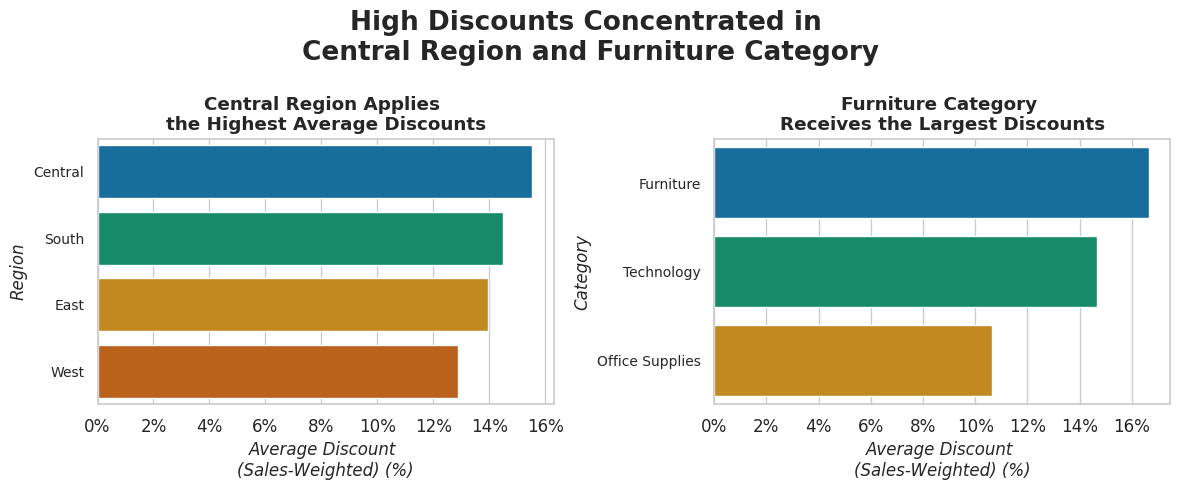

In [82]:
#Create a figure with two subplots for a side-by-side comparison
fig, ax = plt.subplots(1,2, figsize = (12, 5))

#Title of the figure
plt.suptitle("High Discounts Concentrated in \nCentral Region and Furniture Category",
             fontweight = "bold", horizontalalignment = "center",
             size = "x-large")

# Order the weighted discount for each region
order_regions = (wd_region
                 .sort_values("Weighted Discount (%)", ascending=False)["Region"])

# Barplot weighted discount by region
sns.barplot(x="Weighted Discount (%)", y="Region", hue = "Region", data=wd_region,
            errorbar = None, order = order_regions, ax = ax[0])
ax[0].set_title("Central Region Applies \nthe Highest Average Discounts", fontweight = "bold")
ax[0].set_xlabel("Average Discount \n(Sales-Weighted) (%)", fontsize = 12, style= "italic")
ax[0].set_ylabel("Region", fontsize = 12, style= "italic")
ax[0].tick_params('y', labelsize = 10)
ax[0].xaxis.set_major_formatter(mtick.PercentFormatter(xmax = 100, decimals = 0))

# Order the weighted discount for each category
order_category = (wd_category
                 .sort_values("Weighted Discount (%)", ascending=False)
                 ["Category"])

#Barplot of weighted discount by
sns.barplot(x="Weighted Discount (%)", y="Category", data = wd_category,
            hue = "Category",
            errorbar = None, order = order_category, ax = ax[1])
ax[1].set_title("Furniture Category \nReceives the Largest Discounts",
                fontweight = "bold")
ax[1].set_xlabel("Average Discount \n(Sales-Weighted) (%)", fontsize = 12, style= "italic")
ax[1].set_ylabel("Category", fontsize = 12, style= "italic")
ax[1].tick_params('y', labelsize =  10)
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(xmax = 100, decimals = 0))



plt.tight_layout()
plt.show()

The analysis reveals that the Central region applies the highest average sales-weighted discounts (around 16%), while the West region uses lower average sales-weighted discounts (around 13%). Among product categories, Furniture stands out with the steepest discounts (around 16%), exceeding those for Technology (around 14%) and Office Supplies (around 11%).

This pattern aligns with earlier profitability results. Indeed, the Furniture category and Central region also record the weakest profits. The findings indicate that discount policies are a primary driver of marginal profit loss, particularly where aggressive price cuts coincide with already low-margin products. A more restrained discount strategy or selective promotion control would likely improve profitability in those areas.

## Do discounts negatively affect profit margins?

<Figure size 800x600 with 0 Axes>

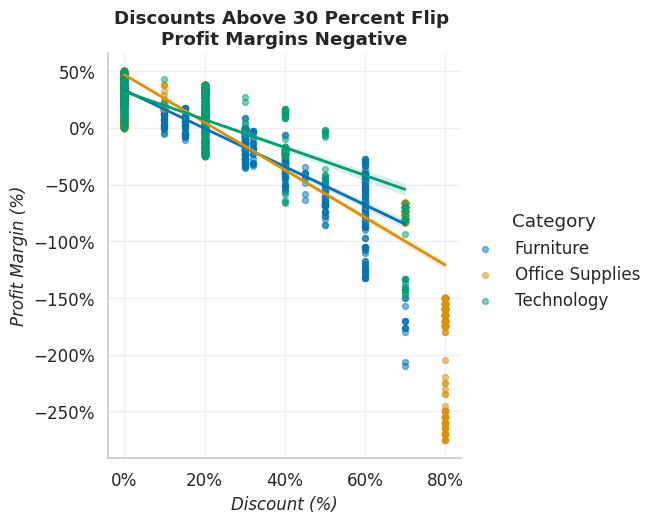

In [83]:
# Regression lines between Profit Margin and Discount by Category
plt.figure(figsize=(8, 6))
ax = sns.lmplot(data = df, x ="Discount", y = "Profit Margin", hue = "Category",
           line_kws = {'lw': 2}, scatter_kws={'alpha':0.5, 's':18})
plt.grid(True, alpha=0.3)
plt.title("Discounts Above 30 Percent Flip \nProfit Margins Negative", fontweight = "bold")
plt.xlabel("Discount (%)", fontsize = 12, style= "italic")
plt.ylabel("Profit Margin (%)", fontsize = 12, style= "italic")

# Iterate over the axes in the Scaterplot and set the formatter for each x-axis
for axis in ax.axes.flat:
    axis.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axis.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [84]:
df_furniture = df.loc[df["Category"] == "Furniture"]
df_furniture[["Discount","Profit Margin"]].corr()


,Discount,Profit Margin
Discount,1.000000,-0.887778
Profit Margin,-0.887778,1.000000


In [85]:
df_office = df.loc[df["Category"] == "Office Supplies"]
df_office[["Discount","Profit Margin"]].corr()


,Discount,Profit Margin
Discount,1.000000,-0.877294
Profit Margin,-0.877294,1.000000


In [86]:
df_tech = df.loc[df["Category"] == "Technology"]
df_tech[["Discount","Profit Margin"]].corr()


,Discount,Profit Margin
Discount,1.000000,-0.755159
Profit Margin,-0.755159,1.000000


Profit margins drop sharply as discounts increase, turning negative once discounts exceed roughly 30%, meaning that aggressive discounnts are financially harmful. This pattern is consistent across all product categories, though the effect is most severe for Furniture, with a correlation of −0.89, and Office Supplies (−0.88), while Technology is slightly more resilient (−0.75).

At very high discount levels, many Office Supplies items experience losses exceeding 150 to 250%, showing that heavy discounts completely erase profitability. Overall, the analysis confirms that aggressive discounting is the single strongest driver of margin destruction, highlighting the need for stricter discount controls, particularly in Furniture and Office Supplies.

# VIII. Sales Volume vs Profit Margin

To visualize the combined effect of discounts, profitability, and sales volume, we plot sub-categories by weighted discount and profit margin.

## What is the relationship between sales volume and profit margin?

In [87]:
# Profit Margin (%) (Sales-Weighted) by Sub-Category and Category
bubble_df = (df.groupby(["Sub-Category", "Category"]).
          apply(lambda g: 100*np.average(g["Profit"] / g["Sales"], weights=g["Sales"]),
          include_groups=False).rename("Profit Margin (%)"))

# Convert Series to DataFrame and rename column
bubble_df = bubble_df.to_frame()

#Adding Sales column
bubble_df["Total Sales ($)"] = (df.groupby(["Sub-Category",
                                             "Category"])["Sales"].sum())

# Discount Average (Sales Weighted)
wd = df.groupby(["Sub-Category","Category"]).apply(
        lambda g: 100*np.average(g["Discount"], weights=g["Sales"]),
        include_groups=False).rename("Weighted Discount (%)")

# Complete dataframe for bubble plot
# Sub-Category, Category, Sales (sum), Profit Margin (%), Discount (%)
bubble_df = bubble_df.join(wd).reset_index()

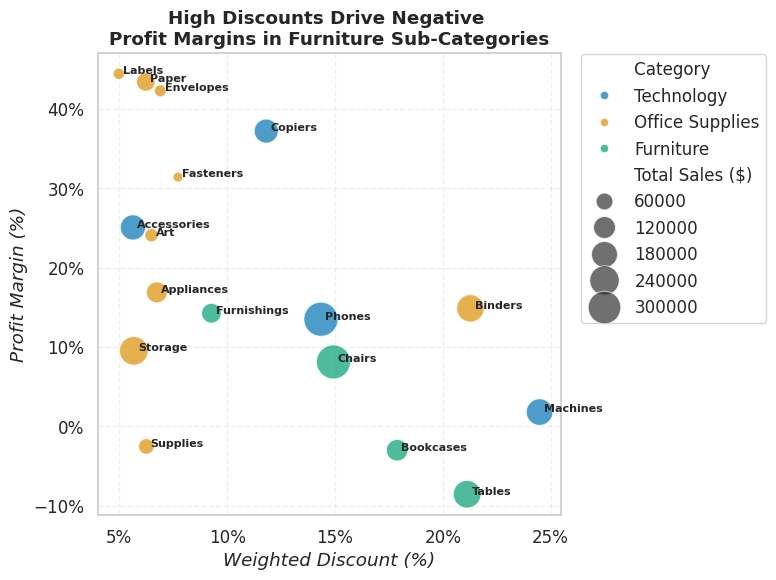

In [88]:
# Size of figure
plt.figure(figsize = (8, 6))

# Bubble chart
ax = sns.scatterplot(data=bubble_df, x="Weighted Discount (%)",
                     y="Profit Margin (%)", size="Total Sales ($)",
                     hue="Category",
                     sizes=(50, 600), alpha=0.7)

# Formatting ticks on x-axis
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start+1, end+1, 5))

# Formatting as Percentage
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax = 100, decimals = 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 100, decimals = 0))

# Annotating sub-categories' labels on the scatter plot
for line in range(0,bubble_df.shape[0]):
     plt.text(
          bubble_df["Weighted Discount (%)"][line]+0.2,
          bubble_df["Profit Margin (%)"][line],
          bubble_df["Sub-Category"][line],
          fontsize=8,
          ha='left',
          weight='bold')

# Titles, labels, and legend
ax.set_title("High Discounts Drive Negative \nProfit Margins in Furniture Sub-Categories",
             fontweight = "bold")
ax.set_xlabel("Weighted Discount (%)", style="italic")
ax.set_ylabel("Profit Margin (%)", style="italic")
legend = plt.legend(title="", bbox_to_anchor=(1.025, 1.015), loc="upper left")
ax.grid(True, linestyle="--", alpha=0.3)

# Visualizing figure
plt.tight_layout()
plt.show()

Sub-categories such as Tables, Bookcases, and Machines operate at or below the profitability threshold, showing negative profit margins despite high sales volumes and significant discounts. These sub-categories combine high discounts with low profitability, making their products the focus of pricing or cost-structure review.

On the opposite, Copiers, Paper, Fasteners, Envelopes, and Labels achieve strong profit margins above 30% with discounts below 15%. Thus, the analysis shows that steep discounts are not necessary for profitability.

In conclusion, the analysis shows a clear pattern: profitability declines as discounts increase, with several large-selling sub-categories effectively selling at a loss. Optimizing discount policies for underperforming items—especially in Furniture and high-cost Technology lines—could yield immediate margin improvement.

# IX. Shipping Performance

Finally, we assess how shipping modes influence both delivery performance and profit margins to identify opportunities for operational improvement.

## Does the shipping mode affect profitability or delivery efficiency?

In [89]:
# Weighted Profit Margin grouped by Ship Mode
ws = df.groupby("Ship Mode").apply(
    lambda g: 100*np.average(g["Profit"] / g["Sales"], weights=g["Sales"]),
    include_groups=False).reset_index(name="Profit Margin (%)")

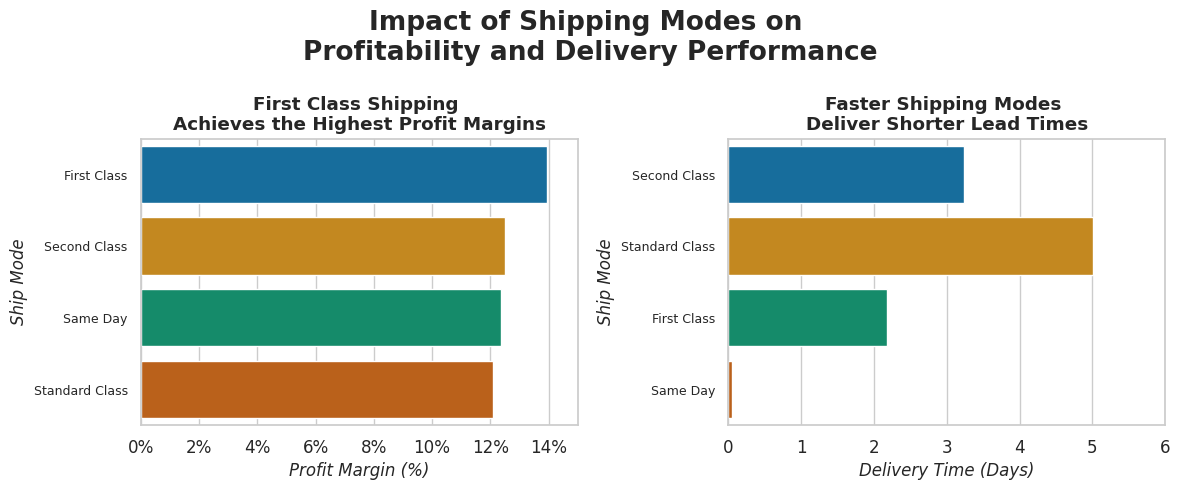

In [90]:
# Ordering values in ship dataset
ship = ws.sort_values("Profit Margin (%)", ascending=False)

# Figure for subplots
fig, ax =  plt.subplots(1,2, figsize = (12, 5))
plt.suptitle("Impact of Shipping Modes on \nProfitability and Delivery Performance",
             fontweight = "bold", size = "x-large", horizontalalignment = "center")

# Barplot - Impact of Shipping Mode on Profit Margin
sns.barplot(data = ship, x = "Profit Margin (%)", y = "Ship Mode",
            hue = "Ship Mode", ax = ax[0])
ax[0].set_title("First Class Shipping \nAchieves the Highest Profit Margins",
                fontweight = "bold")
ax[0].set_xlim(0, 15)
ax[0].set_xlabel("Profit Margin (%)", fontsize = 12, style= "italic")
ax[0].set_ylabel("Ship Mode", fontsize = 12, style= "italic")
ax[0].tick_params('y', labelsize=9) # Changed rotation to 0
ax[0].xaxis.set_major_formatter(mtick.PercentFormatter(xmax = 100, decimals = 0))

# Barplot - Impact of Shipping Mode on Delivery Time
sns.barplot(data = df, x = "Delivery Time", y = "Ship Mode", hue = "Ship Mode",
            estimator = np.mean, errorbar = None,ax = ax[1])
ax[1].set_title("Faster Shipping Modes \nDeliver Shorter Lead Times",
                fontweight = "bold")
ax[1].set_xlim(0, 6)
ax[1].set_xlabel("Delivery Time (Days)", fontsize = 12, style= "italic")
ax[1].set_ylabel("Ship Mode", fontsize = 12, style = "italic")
ax[1].tick_params('y', labelsize=9) # Changed rotation to 0


plt.tight_layout()
plt.show()

The First Class shipping mode yields the highest weighted profit margin (around 14%), followed closely by Second Class and Same Day, while Standard Class performs somewhat lower. Despite the assumption that faster delivery necessarily reduces profit, the data shows that premium shipping does not significantly harm margins.

On the delivery side, Same Day shipping achieves the shortest delivery time, while Standard Class averages around five days. These findings suggest that Superstore’s shipping operations are relatively efficient. However, there may be an opportunity to reassess the pricing and logistics of Standard Class deliveries to improve margins without compromising service levels.

# Key Insights & Recommendations

This analysis of Superstore's sales, profit, and discount data highlights clear patterns in pricing, category & sub-category performance, and operations. Based on our findings, we make the following recommendations to improve profitability and operational efficiency:

**1. Tighten Discount Policies**
- Limit discounts above 25% to 30% since profitability turn negative beyond these rates.
- Implement category-specific discount limits, especially on Furtniture and Office Supplies goods since they are most sensitive to discounts.
- Monitor actively promotional campaigns to ensure discounts keep generating increasing profit and do not incur losses.

**2. Reassess Pricing and Product Strategy**
- Focus on Furniture items that sell at loss, especially bookcases and tables, as they drive negative profits.
- Run a cost review for unprofitable sub-categories and consider price changes or product discontinuation.
- Reinforce strategies for successful and highly profitable sub-categories, such as Copiers, Phones, Accessories, and Papers.

**3. Reinforce Regional Performance**
- Central and South regions lag behind in profit despite comparable sales.
- Evaluate whether excessive discounting or higher shipping costs are reducing margins.
- Use West and East regions as benchmarks for operational and pricing best practices since they are leading in profitability.

**4. Influence Customer Segmentation**
- The Consumer segment is the most profitable customer segment. Maintain their engagement through loyalty programs.
- Improve profitability in Corporate and Home Office segments by reducing discounts and focusing on products with higher profit margins.

**5. Optimize Shipping and Delivery**
- First Class and Same Day shipping modes provide fast delivery while maintaining healthy profit margins.
- Review Standard Class is the least profitable shipping mode. Establish a strategy to reduce shipping costs and improve logistics to improve profitability.

**6. Build a Profitability Dashboard**
- Automate tracking of discount-to-profit margin relationships, regional performance, and category trends to identify marginal risks in real time and minimize profit loss.

## Key Takeaway
Superstore’s profit loss comes primarily from discounting too much and unbalanced product and regional strategies. By applying more disciplined discount policies, optimizing pricing in low-performing categories, and refining shipping cost management, the company can substantially increase profitability without sacrificing sales growth.

This analysis demonstrates how data-driven insights can guide smarter pricing, product, and logistics decisions, directly improving Superstore’s profitability and operational efficiency.

# Technical Summary
Tools: Python (Pandas, Seaborn, Matplotlib)
Skills Demonstrated: Data cleaning, grouping, visualization, KPI computation, business storytelling

In [102]:
!pip install nbconvert

In [103]:
!jupyter nbconvert --to html /content/Superstore_Profitability_Analysis.ipynb

[NbConvertApp] WARNING | pattern '/content/Superstore_Profitability_Analysis.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp